In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Importing Library
import numpy as np
import pandas as pd
import cv2
import os 
from PIL import Image


In [3]:
dir_path = "/content/drive/MyDrive/DATA"
len(dir_path)

27

In [4]:
for dirname, _, filenames in os.walk(dir_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/DATA/apple/apple_1.png
/content/drive/MyDrive/DATA/apple/apple_2.png
/content/drive/MyDrive/DATA/apple/apple_3.png
/content/drive/MyDrive/DATA/apple/apple_4.png
/content/drive/MyDrive/DATA/apple/apple_5 - Copy.png
/content/drive/MyDrive/DATA/apple/apple_5.png
/content/drive/MyDrive/DATA/apple/apple_6.png
/content/drive/MyDrive/DATA/apple/apple_7.jpg
/content/drive/MyDrive/DATA/apple/apple_8.jpg
/content/drive/MyDrive/DATA/apple/apple_1.jpg
/content/drive/MyDrive/DATA/apple/apple_10.jpg
/content/drive/MyDrive/DATA/apple/apple_19.jpg
/content/drive/MyDrive/DATA/apple/apple_22.jpg
/content/drive/MyDrive/DATA/apple/apple_13.jpg
/content/drive/MyDrive/DATA/apple/apple_9.jpg
/content/drive/MyDrive/DATA/apple/apple_20.jpg
/content/drive/MyDrive/DATA/apple/apple_5.jpg
/content/drive/MyDrive/DATA/apple/apple_21.jpg
/content/drive/MyDrive/DATA/apple/apple_4.jpg
/content/drive/MyDrive/DATA/apple/apple_16.jpg
/content/drive/MyDrive/DATA/apple/apple_18.jpg
/content/drive/MyDr

In [5]:
images_apple  =  []       
labels_apple  =  [] 
train_path  =  '/content/drive/MyDrive/DATA/apple'
for filename in os.listdir('/content/drive/MyDrive/DATA/apple'):
    if filename.split('.')[1]  ==  'jpg':
        img  =  cv2.imread(os.path.join(train_path,filename))
        arr = Image.fromarray(img,'RGB')
        img_arr = arr.resize((224,224))
        labels_apple.append(filename.split('_')[0])
        images_apple.append(np.array(img_arr))

In [9]:
images_unknown  =  []       
labels_unknown  =  [] 
train_path  =  '/content/drive/MyDrive/DATA/unknown'
for filename in os.listdir('/content/drive/MyDrive/DATA/unknown'):
    if filename.split('.')[1]  ==  'jpg':
        img  =  cv2.imread(os.path.join(train_path,filename))
        arr = Image.fromarray(img,'RGB')
        img_arr = arr.resize((224,224))
        labels_unknown.append(filename.split('_')[0])
        images_unknown.append(np.array(img_arr))

In [11]:
images = images_unknown + images_apple
labels = labels_unknown + labels_apple

In [12]:
np.unique(labels)

array(['apple', 'unknown'], dtype='<U7')

In [13]:
from sklearn.preprocessing import LabelEncoder
lb_encod  =  LabelEncoder()
labels = pd.DataFrame(labels)
labels = lb_encod.fit_transform(labels[0])
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

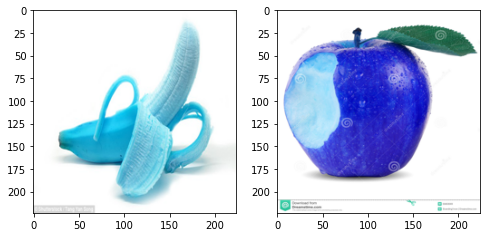

In [14]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize = (8,8))
ax = figure.add_subplot(121)
ax.imshow(images[2])
bx = figure.add_subplot(122)
bx.imshow(images[60])
plt.show()

In [ ]:
#Saving the image array and corresponding labels
images = np.array(images)
np.save("image",images)
np.save("labels",labels)

In [ ]:
#Loading the images and labels that we have saved above
image = np.load("image.npy",allow_pickle = True)
labels = np.load("labels.npy",allow_pickle = True)

In [ ]:
img_shape  = np.arange(image.shape[0])
np.random.shuffle(img_shape)
image = image[img_shape]
labels = labels[img_shape]

In [ ]:
num_classes = len(np.unique(labels))
len_data = len(image)

In [ ]:
x_train, x_test = image[(int)(0.1*len_data):],image[:(int)(0.1*len_data)]
y_train,y_test = labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]


from tensorflow import keras
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.layers import Activation, Convolution2D, Dropout, Conv2D,AveragePooling2D, BatchNormalization,Flatten,GlobalAveragePooling2D
from keras import layers
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau

l2_reg = 0.001
opt = Adam(lr = 0.001)

#Defining the CNN Model
cnn_model  =  Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (2,2), input_shape = (224,224, 3), activation = 'relu',kernel_regularizer = l2(l2_reg)))
cnn_model.add(MaxPool2D(pool_size = (2,2)))
cnn_model.add(Conv2D(filters = 64, kernel_size = (2,2), activation = 'relu',kernel_regularizer = l2(l2_reg)))
cnn_model.add(MaxPool2D(pool_size = (2,2)))
cnn_model.add(Conv2D(filters = 128, kernel_size = (2,2), activation = 'relu',kernel_regularizer = l2(l2_reg)))
cnn_model.add(MaxPool2D(pool_size = (2,2)))
cnn_model.add(Dropout(0.1))

cnn_model.add(Flatten())

cnn_model.add(Dense(64, activation = 'relu'))
cnn_model.add(Dense(16, activation = 'relu'))
cnn_model.add(Dense(2, activation = 'sigmoid'))

#CNN Model Summary
cnn_model.summary()

In [ ]:
#Compiling the model
cnn_model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [ ]:
filepath = "/content/drive/MyDrive/DATA"
#os.path.dirname(os.path.abspath("/content/drive/MyDrive/apple/apple_1.jpg"))
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
#cnn.fit(X_train, y_train, epochs=10)

In [ ]:
history = cnn_model.fit(x_train,y_train,batch_size = 128,epochs = 20,verbose = 1,validation_split = 0.33)

In [ ]:
scores  =  cnn_model.evaluate(x_test, y_test, verbose = 1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


In [ ]:
#Visualize the performance
figure = plt.figure(figsize = (10,5))
ax = figure.add_subplot(121)
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
ax.legend(['Training Accuracy','Val Accuracy'])
bx = figure.add_subplot(122)
bx.plot(history.history['loss'])
bx.plot(history.history['val_loss'])
bx.legend(['Training Loss','Val Loss'])

In [ ]:
##test predictions

In [ ]:
# load the image
import cv2
import imutils
from tensorflow.keras.preprocessing.image import img_to_array
import os
files=os.listdir('/content/drive/MyDrive/test/')
base='/content/drive/MyDrive/test/'
for file in files:


  image = cv2.imread(base+str(file))
  orig = image.copy()
  # pre-process the image for classification
  image = cv2.resize(image, (224, 224))
  image = image.astype("float") / 255.0
  image = img_to_array(image)
  image = np.expand_dims(image, axis=0)

  # load the trained convolutional neural network
  print("[INFO] loading network...")
  #model = load_model(args["model"])
  # classify the input image
  (apple, notapple) = cnn_model.predict(image)[0]
  import matplotlib.pyplot as pyplot

  # build the label
  label = "Apple" if apple > notapple else "Not Apple"
  proba = apple if apple > notapple else notapple
  label = "{}: {:.2f}%".format(label, proba * 100)
  # draw the label on the image
  output = imutils.resize(orig, width=400)
  cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
  0.7, (255,55, 25), 2)
  # show the output image
  pyplot.imshow(output)
  pyplot.show()